In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# 🔁 Recurrent Neural Network (RNN) – Explained Simply

---

## ✅ What is an RNN?

A **Recurrent Neural Network (RNN)** is a type of neural network that is specially designed to work with **sequential data** — data where **order matters** (like time series, sentences, audio, etc.).

Unlike regular neural networks (which assume all inputs are independent), RNNs have **memory** of previous inputs. They use their **hidden state** to retain information across time steps.

---

## 🧠 Core Idea  
At each time step, the RNN:
- Takes an input (e.g., a word or a value)
- Updates a **hidden state** using the current input and the previous hidden state
- Produces an output (optional)

This loop allows it to **“remember” past information**.

---

## 🔁 RNN Cell Diagram



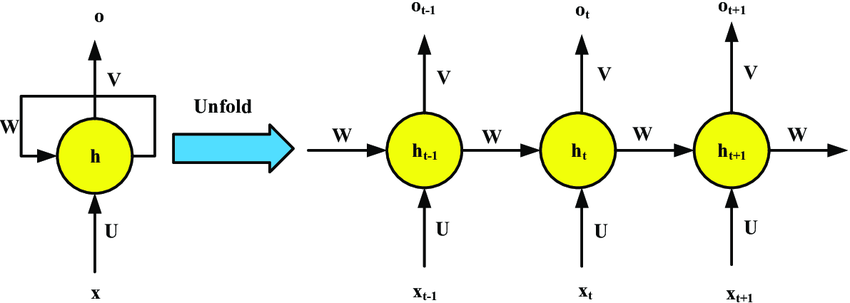

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Lecture Notes & Study Materials/Neural Network & Deeplearning/rnn.png')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7813/7813 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


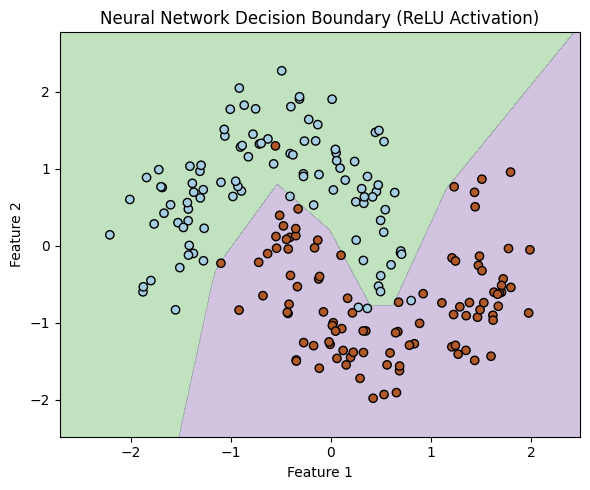

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_scaled, y, epochs=100, verbose=0)

# Create mesh for decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:,0].min()-0.5, X_scaled[:,0].max()+0.5, 500),
                     np.linspace(X_scaled[:,1].min()-0.5, X_scaled[:,1].max()+0.5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Neural Network Decision Boundary (ReLU Activation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()
